<img src = https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png width = 200>
<h1 align=center> Hierarchical Clustering in Python </h1>

<hr>

### Using this notebook:

**Shift + Enter** to run a cell:

# Weather Station Clustering 

## Hierarchical Clustering using python & scikit-learn¶

### About the dataset

Environment Canada		  
Monthly Values for June - 2015	  	
		
Legend  		
Stn_Name::::	Station Name  
Lat	    ::::	Latitude (North + , degrees)  
Long	::::	Longitude (West - , degrees)  
Prov	::::	Province  
Tm	    ::::	Mean Temperature (Â°C)  
DwTm	::::	Days without Valid Mean Temperature  
D	    ::::	Mean Temperature difference from Normal (1981-2010) (Â°C)  
Tx	    ::::	Highest Monthly Maximum Temperature (Â°C)  
DwTx	::::	Days without Valid Maximum Temperature  
Tn	    ::::	Lowest Monthly Minimum Temperature (Â°C)  
DwTn	::::	Days without Valid Minimum Temperature  
S	    ::::	Snowfall (cm)  
DwS	    ::::	Days without Valid Snowfall  
S%N	    ::::	Percent of Normal (1981-2010) Snowfall  
P	    ::::	Total Precipitation (mm)  
DwP	    ::::	Days without Valid Precipitation  
P%N	    ::::	Percent of Normal (1981-2010) Precipitation  
S_G  	::::	Snow on the ground at the end of the month (cm)  
Pd	    ::::	Number of days with Precipitation 1.0 mm or more  
BS	    ::::	Bright Sunshine (hours)  
DwBS	::::	Days without Valid Bright Sunshine  
BS%  	::::	Percent of Normal (1981-2010) Bright Sunshine  
HDD 	::::	Degree Days below 18 Â°C  
CDD	    ::::	Degree Days above 18 Â°C  
Stn_No	::::	Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).  
NA	    ::::	Not Available  

### 1-Download data into your Data Scientist Workbench

In [17]:
!wget -O weather-stations20140101-20141231.csv https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv

/bin/sh: wget: command not found


### 2- Load the dataset

In [18]:
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### 3- Data Cleaning

In [19]:
pdf = pdf[pd.notnull(pdf["Tm"]) & np.isfinite(pdf['Tm'])]
pdf = pdf.reset_index(drop=True)
pdf.head(20)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
5,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,...,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
6,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,...,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
7,NORTH COWICHAN,48.824,-123.719,BC,7.7,0.0,NaN,14.7,0.0,-2.6,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,288.8,0.0,1015630
8,NORTH PENDER ISLAND,48.764,-123.287,BC,8.6,1.0,NaN,14.0,1.0,2.0,...,1.0,NaN,0.0,13.0,NaN,NaN,NaN,253.6,0.0,1015638
9,RACE ROCKS,48.298,-123.531,BC,9.6,0.0,NaN,15.6,0.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.7,0.0,1016640


### 4- Data Visualization

/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: Matplotli

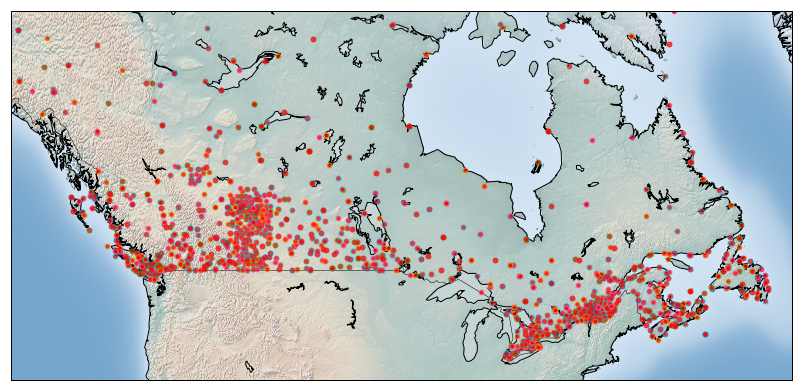

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon = -140
ulon = -50
llat = 40
ulat = 65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] = ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



### 5- Data Sampling

In [44]:
import random
my_randoms = random.sample(range(len(pdf)), 30)
hpdf = pdf.ix[my_randoms,:]
hpdf = hpdf.reset_index(drop=True)
hpdf

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym
0,PICKLE LAKE A,51.446,-90.214,ON,-23.2,0.0,NaN,-6.7,0.0,-36.3,...,44.0,NaN,NaN,NaN,NaN,1154.5,0.0,6016529,5.535948e+06,1.832572e+06
1,HAMILTON A,43.174,-79.935,ON,-13.6,0.0,NaN,-0.7,0.0,-29.1,...,50.0,11.0,NaN,NaN,NaN,885.5,0.0,6153193,6.678920e+06,4.720228e+05
2,BRETON PLOTS,53.089,-114.441,AB,-7.5,0.0,NaN,12.8,0.0,-24.2,...,NaN,10.0,NaN,NaN,NaN,715.1,0.0,3010816,2.842030e+06,2.131147e+06
3,ISLAND LAKE A,53.857,-94.654,MB,-24.6,0.0,NaN,-6.1,0.0,-37.0,...,40.0,6.0,NaN,NaN,NaN,1192.9,0.0,5061375,5.042243e+06,2.274629e+06
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VICTORIA INTL A,48.647,-123.426,BC,7.8,0.0,NaN,14.4,0.0,-0.5,...,NaN,14.0,NaN,NaN,NaN,285.7,0.0,1018621,1.842944e+06,1.347723e+06
6,ENTRANCE ISLAND,49.209,-123.809,BC,8.3,6.0,NaN,13.0,6.0,3.5,...,0.0,11.0,NaN,NaN,NaN,213.6,0.0,102BFHH,1.800356e+06,1.442840e+06
7,QUEENSTOWN,50.606,-112.983,AB,-6.4,0.0,-0.8,15.0,0.0,-24.5,...,0.0,1.0,NaN,NaN,NaN,683.0,0.0,3035340,3.004152e+06,1.684064e+06
8,TATAMAGOUCHE,45.683,-63.233,NS,-12.4,0.0,NaN,5.5,0.0,-28.5,...,0.0,12.0,NaN,NaN,NaN,851.4,0.0,8205774,8.536097e+06,8.627853e+05
9,MERRITT,50.113,-120.778,BC,3.2,0.0,NaN,13.8,0.0,-8.4,...,NaN,0.0,NaN,NaN,NaN,414.9,0.0,1125073,2.137388e+06,1.598135e+06


### 6- Data Clustering using average temperature

In [39]:
#Normalization
from sklearn.preprocessing import normalize
import pylab
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot 
%matplotlib inline
hpdf.replace("NaN","0")

Temper = np.asarray( hpdf['Tm'])
nx = normalize(Temper.astype(float),axis=1)
x = nx[0]
D = scipy.zeros([x.size,x.size])
for i in range(x.size):
    for j in range(x.size):
        D[i,j] = abs(x[i] - x[j])

ValueError: Expected 2D array, got 1D array instead:
array=[-16.1 -16.1 -16.   -6.4 -10.8 -11.8 -11.6  -4.6  -9.4 -16.4 -20.8 -11.
 -27.9   nan -17.6 -18.5 -25.9  -6.  -31.4   8.9 -24.   -7.8 -21.9 -13.
  -8.  -16.   -0.2 -12.1 -19.7 -16.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 7- Plot the first dendrogram

NameError: name 'D' is not defined

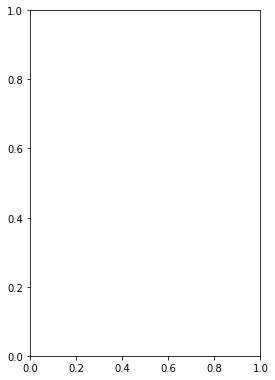

In [35]:
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
#ax1.set_yticks([])
lb = zip(map(lambda x: round(x,2),Temper[Z1['leaves']]),hpdf['Stn_Name'][Z1['leaves']])
ax1.set_yticklabels(lb)
fig.show()

### 8-Clustering based on location and temperature

In [40]:
#Normalization
from sklearn.preprocessing import normalize
import pylab
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot 
%matplotlib inline


x = normalize(np.asarray( hpdf['Tm']).astype(float), axis=1)[0]
y = normalize(np.asarray( hpdf['Tn']).astype(float), axis=1)[0]
z = normalize(np.asarray( hpdf['Tx']).astype(float), axis=1)[0]
xm = normalize(np.asarray( hpdf['xm']).astype(float), axis=1)[0]
ym = normalize(np.asarray( hpdf['ym']).astype(float), axis=1)[0]

p=zip(x,y,z,xm,ym)


D = scipy.zeros([x.size,x.size])
for i in range(x.size):
    for j in range(x.size):
        D[i,j] = scipy.spatial.distance.euclidean(p[i], p[j])
        #abs(x[i] - x[j])

ValueError: Expected 2D array, got 1D array instead:
array=[-16.1 -16.1 -16.   -6.4 -10.8 -11.8 -11.6  -4.6  -9.4 -16.4 -20.8 -11.
 -27.9   nan -17.6 -18.5 -25.9  -6.  -31.4   8.9 -24.   -7.8 -21.9 -13.
  -8.  -16.   -0.2 -12.1 -19.7 -16.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 9-Visualization dendrogram.

In [ ]:
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
#ax1.set_yticks([])
lb=zip(map(lambda x: round(x,2),hpdf.Tx[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Tm[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Tn[Z1['leaves']]), \
       hpdf['Stn_Name'][Z1['leaves']],\
       map(lambda x: round(x,2),hpdf.Lat[Z1['leaves']]), \
       map(lambda x: round(x,2),hpdf.Long[Z1['leaves']]) \
      )
ax1.set_yticklabels(lb)
fig.show()

### 10- Clustering results (Labels)

In [ ]:
labels = sch.fcluster(Y, 0.8*D.max(), 'distance')
hpdf["Clus_hier"]=labels-1
clusterNum=labels.max()
print (hpdf.Clus_hier)


### 11-Visualization of clusters

/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/bulent/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: Matplotli

NameError: name 'clusterNum' is not defined

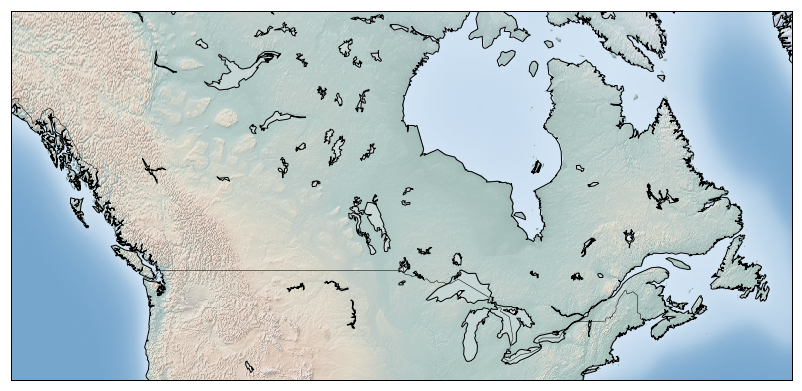

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in hpdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =colors[np.float(row.Clus_hier)],  marker='o', markersize= 5, alpha = 0.75)

for i in range(clusterNum): 
    cluster=hpdf[["Stn_Name","Tm","xm","ym","Clus_hier"]][hpdf.Clus_hier==i]
    cenx=np.mean(cluster.xm) 
    ceny=np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    #print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))